In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
url = 'https://br.financas.yahoo.com/quote/PETR4.SA?p=PETR4.SA&.tsrc=fin-srch'
r = requests.get(url)

In [33]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5

In [6]:
# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [7]:
# consultamos o estado e os parâmetros de conexão
print(mt5.terminal_info())
# obtemos informações sobre a versão do MetaTrader 5
print(mt5.version())

TerminalInfo(community_account=True, community_connection=True, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2998, maxbars=100000, codepage=1252, ping_last=29113, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaTrader 5', data_path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaQuotes\\Terminal\\FA37627ACD9883F78C7D602A14544768', commondata_path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2998, '15 Jul 2021')


In [8]:
simb = 'PETR4'
mt5.symbol_info_tick('PETR4')

Tick(time=1630494900, bid=27.05, ask=27.06, last=27.05, volume=100, time_msc=1630494900822, flags=0, volume_real=100.0)

In [6]:
def valor_acao():
    tempo = time.time() + 10
    while time.time() < tempo:
        tick = mt5.symbol_info_tick('PETR4')
        print(f'{simb} - last: {tick.last}, bid: {tick.bid}, ask:{tick.ask}', end='\r')
    return tick.last

In [7]:
for step in range(1,10):
    price=[]
    col =[]
    time_stamp = datetime.datetime.now()
    time_stamp = time_stamp.strftime('%Y-%m-%d %H:%M:%S')
    time.sleep(2)
    tick = mt5.symbol_info_tick('PETR4')
    price.append(tick.bid)
    col = [time_stamp]
    col.extend(price)
    df = pd.DataFrame(col)
    df = df.T
    df.to_csv('real time stock data.csv')
    print(col)

['2021-09-01 10:52:48', 27.0]
['2021-09-01 10:52:50', 27.0]
['2021-09-01 10:52:52', 27.0]
['2021-09-01 10:52:54', 27.0]


KeyboardInterrupt: 

In [31]:
import matplotlib.animation as animation
from matplotlib import style

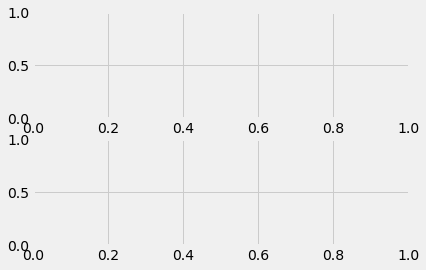

In [50]:
style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

In [49]:
def animate(i):
    df = pd.read_csv('real time stock data.csv')
    ys = df.iloc[1:, 2].values
    xs = list(range(1, len(ys)+1))
    ax1.clear()
    ax1.plot(xs, ys)

    ys = df.iloc[1:, 3].values
    xs = list(range(1, len(ys)+1))
    ax2.clear()
    ax2.plot(xs, ys)

    ys = df.iloc[1:, 4].values
    xs = list(range(1, len(ys)+1))
    ax3.clear()
    ax3.plot(xs, ys)

    ys = df.iloc[1:, 5].values
    xs = list(range(1, len(ys)+1))
    ax4.clear()
    ax4.plot(xs, ys)

In [50]:
ani = animation.FuncAnimation(fig, animate, interval = 10000)
plt.tight_layout()
plt.show()

C:\Users\Maike.mota\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

In [25]:
import csv
import datetime
import time
import MetaTrader5 as mt5

tick = mt5.symbol_info_tick('PETR4')

x_value = 0
bid = tick.last
ask = tick.ask

In [ ]:
ask

27.1

In [24]:
c = mt5.symbol_info_tick('PETRI276')
p = mt5.symbol_info_tick('PETRU276')

call = c.last
put = p.last

AttributeError: 'NoneType' object has no attribute 'last'

In [51]:
import csv
import datetime
import time
import MetaTrader5 as mt5

# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

a = mt5.symbol_info_tick('PETR4')
c = mt5.symbol_info_tick('PETRI276')
p = mt5.symbol_info_tick('PETRU276')

x_value = 0
acao = a.last
call = c.last
put = p.last

fieldnames = ["x_value", "call", "put", "acao"]


with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "call": call,
            "put": put,
            "acao": acao
        }

        csv_writer.writerow(info)
        print(x_value, call, put, acao)

        time_stamp = datetime.datetime.now()
        x_value = time_stamp.strftime('%Y-%m-%d %H:%M:%S')

        a = mt5.symbol_info_tick('PETR4')
        c = mt5.symbol_info_tick('PETRI276')
        p = mt5.symbol_info_tick('PETRU276')
        
        acao = a.last
        call = c.last
        put = p.last

    time.sleep(3)

0 0.79 0.83 26.74
2021-09-02 15:23:45 0.79 0.83 26.74
2021-09-02 15:23:48 0.79 0.83 26.75
2021-09-02 15:23:51 0.79 0.83 26.75
2021-09-02 15:23:54 0.79 0.83 26.73
2021-09-02 15:23:57 0.79 0.83 26.74
2021-09-02 15:24:00 0.79 0.83 26.74
2021-09-02 15:24:03 0.79 0.83 26.74
2021-09-02 15:24:06 0.79 0.83 26.73
2021-09-02 15:24:09 0.79 0.83 26.74
2021-09-02 15:24:12 0.79 0.83 26.73
2021-09-02 15:24:15 0.79 0.83 26.74
2021-09-02 15:24:18 0.79 0.83 26.73
2021-09-02 15:24:21 0.79 0.83 26.73
2021-09-02 15:24:24 0.79 0.83 26.74
2021-09-02 15:24:27 0.79 0.83 26.73
2021-09-02 15:24:30 0.79 0.83 26.73
2021-09-02 15:24:33 0.79 0.83 26.73
2021-09-02 15:24:36 0.78 0.83 26.73
2021-09-02 15:24:39 0.78 0.83 26.72
2021-09-02 15:24:42 0.78 0.83 26.72
2021-09-02 15:24:45 0.78 0.83 26.73
2021-09-02 15:24:48 0.78 0.83 26.72
2021-09-02 15:24:51 0.78 0.84 26.73
2021-09-02 15:24:54 0.78 0.84 26.73
2021-09-02 15:24:57 0.78 0.84 26.74
2021-09-02 15:25:00 0.78 0.84 26.73
2021-09-02 15:25:03 0.78 0.84 26.72
2021-09-02